En este ejercicio se utiliza un LSTM autoencoder para buscar anomalias en unos sensores de vibraciones colocados en unos rodamientos

Primero importamos las librerias

In [1]:
#_________________TODO_______________________
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Importamos datos, y preprocesamos.

En vez de utilizar todos los datos de cada csv, calcularemos la media de cada sensor por archivo, y lo juntaremos en un único pandas dataframe, donde el index, será la fecha y la hora.

In [2]:
# load, average and merge sensor samples
data_dir = 'data/2nd_test/'
merged_data = pd.DataFrame()

for filename in os.listdir(data_dir):
    #_____________________TODO__________________________________________-
    #read CSV
    dataset = pd.read_csv(data_dir+filename, sep='\t',header=None)
    #calculate mean value of sensors
    dataset_mean_abs = np.array(dataset.abs().mean())
    #append to "merged_data" and add index value date and time (you have that information in the filename)
    instance = pd.DataFrame([dataset_mean_abs], index=[filename])
    merged_data = merged_data.append(instance)

merged_data.columns = ['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4']

#transform data file index to datetime and sort in chronological order
merged_data.index = pd.to_datetime(merged_data.index, format='%Y.%m.%d.%H.%M.%S')
merged_data = merged_data.sort_index()
merged_data.to_csv('Averaged_BearingTest_Dataset.csv')
print("Dataset shape:", merged_data.shape)
merged_data.head()


train = merged_data['2004-02-12 10:52:39': '2004-02-15 12:52:39']
test = merged_data['2004-02-15 12:52:39':]
print("Training dataset shape:", train.shape)
print("Test dataset shape:", test.shape)

Dataset shape: (984, 4)
Training dataset shape: (445, 4)
Test dataset shape: (538, 4)


Plot training and testing data 

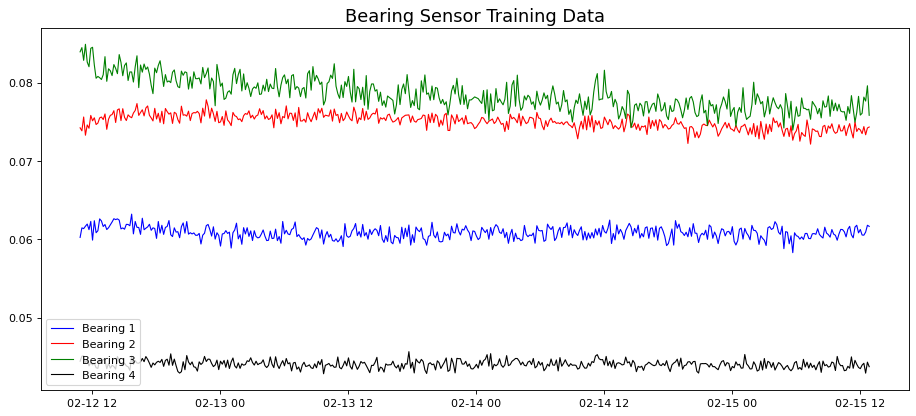

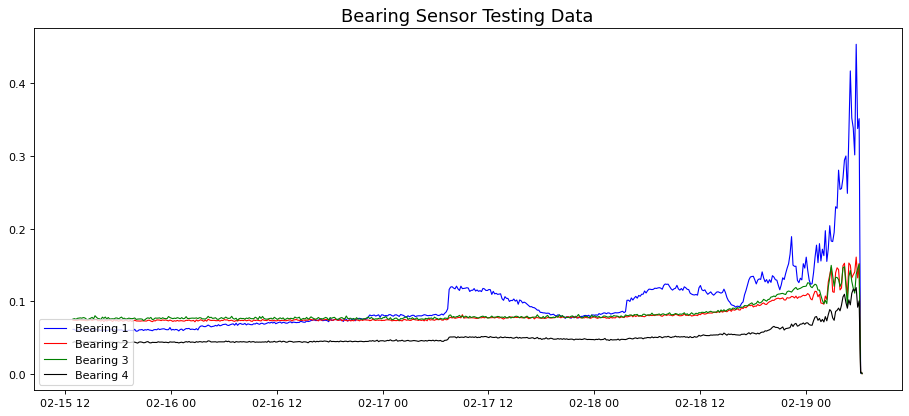

In [3]:



fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(train['Bearing 1'], label='Bearing 1', color='blue', linewidth=1)
ax.plot(train['Bearing 2'], label='Bearing 2', color='red', linewidth=1)
ax.plot(train['Bearing 3'], label='Bearing 3', color='green', linewidth=1)
ax.plot(train['Bearing 4'], label='Bearing 4', color='black', linewidth=1)
plt.legend(loc='lower left')
ax.set_title('Bearing Sensor Training Data', fontsize=16)
plt.show()

fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(test['Bearing 1'], label='Bearing 1', color='blue', linewidth=1)
ax.plot(test['Bearing 2'], label='Bearing 2', color='red', linewidth=1)
ax.plot(test['Bearing 3'], label='Bearing 3', color='green', linewidth=1)
ax.plot(test['Bearing 4'], label='Bearing 4', color='black', linewidth=1)
plt.legend(loc='lower left')
ax.set_title('Bearing Sensor Testing Data', fontsize=16)
plt.show()



Scale with MinMaxScaler and reshape data to be tensor inputs for lstm

In [4]:
#_________TODO_________________
#minmaxscale
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

# reshape inputs for LSTM [samples, timesteps, features]
n_samples = train.shape[0]
n_steps = train.shape[1] 
n_features = 1
print(n_samples, n_steps, n_features)
train = train.reshape((n_samples, n_steps, n_features))
test = train.reshape((n_samples, n_steps, n_features))

445 4 1


Define Autoencoder model (LSTM autoencoder)
compile and fit

In [9]:
from tensorflow.keras import models, layers
# define the autoencoder network model
def autoencoder_model(X):
    inputs = layers.Input(shape=(X.shape[1], X.shape[2]))
    L1 = layers.LSTM(16, activation='relu', return_sequences=True,)(inputs)
    L2 = layers.LSTM(4, activation='relu', return_sequences=False)(L1)
    L3 = layers.RepeatVector(X.shape[1])(L2)
    L4 = layers.LSTM(4, activation='relu', return_sequences=True)(L3)
    L5 = layers.LSTM(16, activation='relu', return_sequences=True)(L4)
    output = layers.TimeDistributed(layers.Dense(X.shape[2]))(L5)
    model = models.Model(inputs=inputs, outputs=output)
    return model

#_________TODO________________ compile, and fit
model = autoencoder_model(train)
model.compile(optimizer='rmsprop', loss='mse')
history = model.fit(train, epochs=10, validation_data=(test,))

Train on 445 samples, validate on 445 samples
Epoch 1/10
 32/445 [=>............................] - ETA: 2s

IndexError: list index out of range

Plot loss history

In [ ]:
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()





```
# This is formatted as code
```

Predict Train

In [ ]:
#make the prediction of Xtrain values
#_______TODO_____________
X_pred=#Todo

Calculate the MAE loss in training phase and set threshold

In [ ]:
LossMAE = np.mean(np.abs(X_pred-Xtrain), axis = 1)
thres=LossMAE.mean()+3*LossMAE.std()
print(thres)



calculate the loss on the test set

In [ ]:
#Make prediction of Xtest, and calculate the loss MAE of the test set
#________TODO__________________-

Plot, train MAE losses, threshold and TestMAE looses

In [ ]:
#____________TODO__________________-